#  Real Network Analysis from Data 

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import nxviz as nv
from collections import Counter

%matplotlib inline

def degree_distr(net):
    degrees = dict(net.degree()) 
    hist = list(Counter(degrees.values()).items()) 
    hist.sort(key=lambda x:x[0])
    hist = np.array(hist)
    return hist

# Case Studies

## Social Networks - Facebook Pages
using ***Graph Embedding with Self Clustering: Facebook data*** 

- data location: SNAP (Stanford Large Network Dataset Collection)
- source: B. Rozemberczki, R. Davies, R. Sarkar and C. Sutton. GEMSEC: Graph Embedding with Self Clustering. 2018.

<img src="../images/data.png" alt="Data" style="width: 300px;"/>

* nodes: pages
* edges: mutual likes among them -> this means undirected & networks


There are 8 different networks representing different categories. For our current analysis, we will analyze and compare 4 networks `Company`, `Artist`, `Politician` and `Public Figure`, however, you can play with all of them to get used to manipulating networks and computing structural property measures, and to gain insights about the data.

## Load network from file

In [13]:
# load edgelists from data file
co_net = nx.read_edgelist("datafiles/social/facebook/facebook_clean_data/company_edges.csv", delimiter=',')
art_net = nx.read_edgelist("datafiles/social/facebook/facebook_clean_data/artist_edges.csv", delimiter=',')
poli_net = nx.read_edgelist("datafiles/social/facebook/facebook_clean_data/politician_edges.csv", delimiter=',')
pub_net = nx.read_edgelist("datafiles/social/facebook/facebook_clean_data/public_figure_edges.csv", delimiter=',')

## Analyze network

In [14]:
# check number of nodes and edges 
N = len(poli_net.nodes)
print(N)

E = len(poli_net.edges)
print(E)

5908
41729


Let's see what is on average the number of mutual 'Likes' (connections) each page (node) has. 

In [15]:
# calculate average degree of politician pages
degrees = [deg for node, deg in nx.degree(poli_net)]
kavg = np.mean(degrees)
print("The # of mutual likes politician pages have on average:", kavg)

# calculate average degree of artist pages
degrees = [deg for node, deg in nx.degree(art_net)]
kavg = np.mean(degrees)
print("The # of mutual likes artist pages have on average:", kavg)

# calculate average degree of company pages
degrees = [deg for node, deg in nx.degree(co_net)]
kavg = np.mean(degrees)
print("The # of mutual likes company pages have on average:", kavg)

# calculate average degree of public figure pages
degrees = [deg for node, deg in nx.degree(pub_net)]
kavg = np.mean(degrees)
print("The # of mutual likes public figure pages have on average:", kavg)

The # of mutual likes politician pages have on average: 14.126269465132024
The # of mutual likes artist pages have on average: 32.43812728892408
The # of mutual likes company pages have on average: 7.413023453553461
The # of mutual likes public figure pages have on average: 11.606398616515348


What about the degree distribution in the networks?

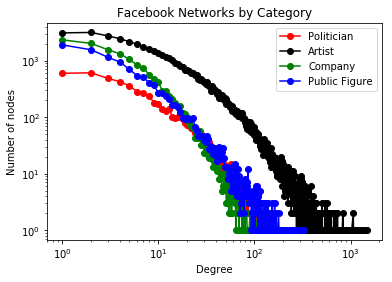

In [16]:
hist_poli = degree_distr(poli_net)
hist_art = degree_distr(art_net)
hist_co = degree_distr(co_net)
hist_pub = degree_distr(pub_net)

plt.figure()
plt.loglog(hist_poli.T[0],hist_poli.T[1],'ro-')
plt.loglog(hist_art.T[0],hist_art.T[1],'ko-')
plt.loglog(hist_co.T[0],hist_co.T[1],'go-')
plt.loglog(hist_pub.T[0],hist_pub.T[1],'bo-')
plt.legend(['Politician', 'Artist', 'Company', 'Public Figure'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Facebook Networks by Category')
plt.savefig('fb_network_degree_distr.png')

In [17]:
# we can check assortativity
print("Politician network assortativity: {}".format(nx.degree_assortativity_coefficient(poli_net)))
print("Artist network assortativity: {}".format(nx.degree_assortativity_coefficient(art_net)))
print("Company network assortativity: {}".format(nx.degree_assortativity_coefficient(co_net)))
print("Public figure network assortativity: {}".format(nx.degree_assortativity_coefficient(pub_net)))

Politician network assortativity: 0.0182443427670884
Artist network assortativity: -0.01906626068251133
Company network assortativity: 0.012977786248196819
Public figure network assortativity: 0.202161548290631


In [18]:
# check clustering coefficient
cc = nx.clustering(poli_net)
avg_cc_poli = sum(cc.values()) / len(cc)
print("Politician network clustering coefficient:", avg_cc_poli)

cc = nx.clustering(art_net)
avg_cc_art = sum(cc.values()) / len(cc)
print("Artist network clustering coefficient:", avg_cc_art)

cc = nx.clustering(co_net)
avg_cc_co = sum(cc.values()) / len(cc)
print("Company network clustering coefficient:", avg_cc_co)

cc = nx.clustering(pub_net)
avg_cc_pub = sum(cc.values()) / len(cc)
print("Public figure network clustering coefficient:", avg_cc_pub)

Politician network clustering coefficient: 0.385096125793274
Artist network clustering coefficient: 0.13812042114553588
Company network clustering coefficient: 0.2392418380399809
Public figure network clustering coefficient: 0.17934725117824554


## Visualize network

**Homework:** Try out multiple visualizations, and decide which visualization method creates an informative plot for the network.

## Takeaways

* politician network has highest clustering coefficient (CC = 0.39) -> political views tend to cluster people more densely
* public figure network has the highest assortativity -> the only network that reflects human relationship type of connectivity
* disassortativity seen only in artist networks may be indicative of competitiveness, desire not to like/promote other popular peers
* lowest average degree found in company network
* highest average degree seen in artist network
* each network has similar degree distribution with heavy tail -> most nodes have small number of connections, while a few nodes (hubs) have significantly higher number of links
* and many more insights with more detailed analyses -> it is your homework to explore more! :)

## Social Networks - Physicians 

In [19]:
# load physicians network
G_phys = nx.read_edgelist("datafiles/social/physicians/out.moreno_innovation_innovation", comments='%')

In [20]:
len(G_phys.nodes)

241

In [21]:
len(G_phys.edges)

923

/Users/lgaalves/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


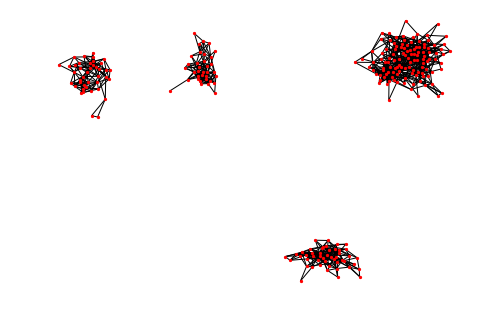

In [22]:
nx.draw(G_phys, node_size=5)

In [23]:
nx.is_connected(G_phys)

False

In [24]:
nx.number_connected_components(G_phys)

4

In [25]:
cc = nx.clustering(G_phys)
avg_cc_poli = sum(cc.values()) / len(cc)
print("Physicians network clustering coefficient:", avg_cc_poli)

Physicians network clustering coefficient: 0.31157513564640726


In [26]:
hist_pub = degree_distr(G_phys)

Text(0.5, 1.0, 'Physicians')

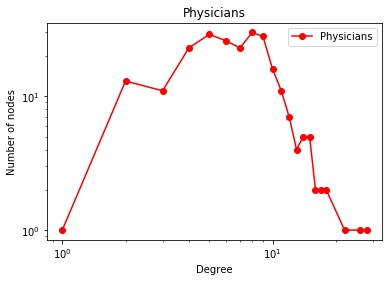

In [27]:
plt.figure()
plt.loglog(hist_pub.T[0],hist_pub.T[1],'ro-')
plt.legend(['Physicians'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Physicians')

In [28]:
ba = nx.barabasi_albert_graph(100, 3)

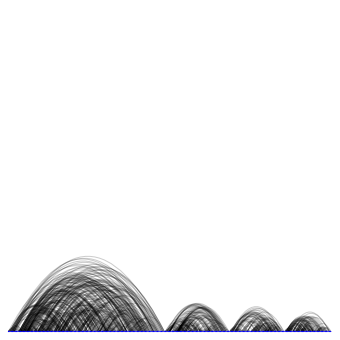

In [29]:
nv.ArcPlot(G_phys).draw()

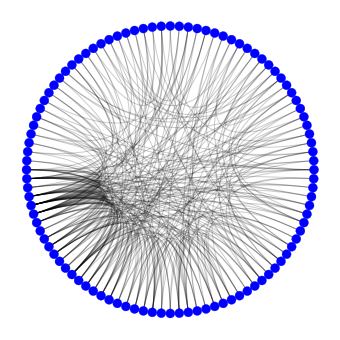

In [30]:
nv.CircosPlot(ba).draw()

We practiced and tried out different analysis techniques using social network data as case-study. 

**Homework:** below you can explore the infrastructure, technological, biological, lexical networks and analyze their properties on your own! 

## Infrastructure Networks

In [31]:
G_infra = nx.read_edgelist("datafiles/infrastructure/powergrid/out.opsahl-powergrid", comments='%')

## Technological Networks

In [32]:
G_tech = nx.read_edgelist("datafiles/technological/p2p/p2p-Gnutella08.txt")

## Biological Networks

In [33]:
G_bio = nx.read_edgelist("datafiles/biological/protein/out.moreno_propro_propro", comments='%')

## Lexical Networks

How to import node attributes located in a separate file.

In [34]:
G_lex = nx.read_edgelist("datafiles/lexical/david_copperfield/out.adjnoun_adjacency_adjacency", comments='%')

Nodes are listed as numbers, but when visualizing our network, we would like to see the words that represent those nodes. The words are stored in a separate file, in `ent.adjnoun_adjacency_adjacency.word.name`, and the index of the word corresponds to the index of the node. 

In [35]:
# load node name data for each node in the network
with open("datafiles/lexical/david_copperfield/ent.adjnoun_adjacency_adjacency.word.name") as file:
    node_name = {}
    i = 1 
    for line in file:
        node_name[str(i)] = line.strip()
        i += 1

In [36]:
# assign the name of the node to the node in the graph
nx.set_node_attributes(G_lex, node_name, 'name')

In [37]:
nx.get_node_attributes(G_lex, 'name')

{'1': 'man',
 '2': 'agreeable',
 '3': 'old',
 '9': 'first',
 '14': 'black',
 '18': 'little',
 '19': 'young',
 '20': 'best',
 '29': 'better',
 '42': 'certain',
 '46': 'happy',
 '47': 'common',
 '52': 'good',
 '92': 'alone',
 '103': 'poor',
 '4': 'person',
 '12': 'air',
 '22': 'friend',
 '23': 'love',
 '24': 'part',
 '25': 'room',
 '26': 'thing',
 '27': 'time',
 '28': 'way',
 '32': 'place',
 '35': 'woman',
 '37': 'door',
 '43': 'day',
 '51': 'dear',
 '55': 'pretty',
 '67': 'head',
 '74': 'life',
 '84': 'house',
 '94': 'miserable',
 '98': 'name',
 '99': 'pleasant',
 '105': 'same',
 '106': 'strong',
 '112': 'year',
 '11': 'bad',
 '44': 'other',
 '86': 'money',
 '5': 'short',
 '6': 'anything',
 '7': 'arm',
 '33': 'right',
 '40': 'evening',
 '90': 'thought',
 '8': 'round',
 '53': 'home',
 '56': 'open',
 '16': 'face',
 '38': 'eye',
 '39': 'bright',
 '71': 'hand',
 '76': 'large',
 '88': 'small',
 '107': 'something',
 '10': 'aunt',
 '13': 'boy',
 '41': 'morning',
 '60': 'great',
 '61': 'master'

/Users/lgaalves/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


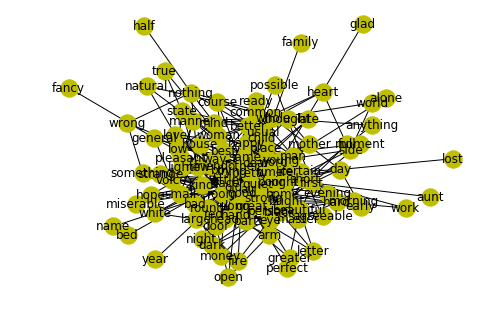

In [38]:
nx.draw(G_lex, labels=node_name, node_color='y')